Podczas tych zajęć zapoznamy się z \textbf{metodą grupowania k-średnich} (ang. k-means). Jest to dosyć prosty algorytm uczenia nienadzorowanego, który pozwala przyporządkować skupiska danych do klastrów.

Zacznijmy tradycyjnie od importowania bibliotek.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Stwórzmy teraz zbiór danych składający się z dwóch wymiarów, 200 próbek, podzielony na 4 centra. Odchylenie standardowe klastrów ma wynosić 0.6. Na koniec dokonajmy wizualizacji zbioru.

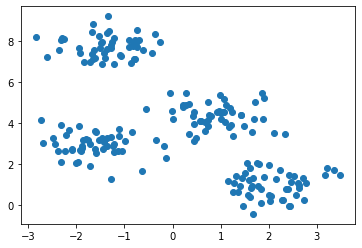

In [5]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4,
                  cluster_std=0.6, random_state=0, shuffle=True)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Napiszmy funkcję do grupowania metodą k-średnich.

In [7]:
def k_means_clustering(data, n_clusters, init, epochs):
    clustering = KMeans(n_clusters=n_clusters, random_state=1,
                        init=init, max_iter=epochs).fit(data)
    # Sprawdźmy, gdzie zostały przypisane dane punkty
    assignment = clustering.labels_
    # Zobaczmy, jak wyglądają środki ciężkości grup
    centroids = clustering.cluster_centers_
    # Dokonajmy wizualizacji podziału danych
    fig, ax = plt.subplots()
    points = ax.scatter(X[:, 0], X[:, 1], c=assignment)
    # Środki ciężkości klastrów zaznaczymy na czerwono
    centres = ax.scatter(centroids[:, 0], centroids[:, 1], c='red')
    legend = ax.legend(*points.legend_elements(),
                       title='klaster')
    ax.add_artist(legend)
    plt.show()
    
    # Zwrócimy model, przyporządkowanie dla naszego zbioru oraz centroidy
    return clustering, assignment, centroids

Podzielmy wygenerowany wcześniej zbiór na 4 klastry (zgodnie ze sposobem, w jaki je wygenerowaliśmy). Niech algorytm wybierze środki ciężkości według podejścia k-Means++ (więcej w dokumentacji i wstępie do laboratorium), a maksymalną liczbą iteracji niech będzie 300.

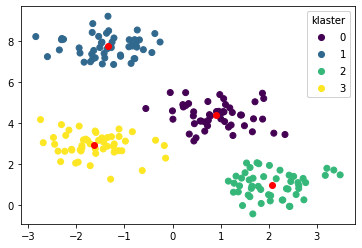

In [9]:
make_cluster, assigment, centroids = k_means_clustering(X, 4, 'k-means++', 300)

Jak widzimy, dla tak prostego zbioru danych algorytm poradził sobie znakomicie. Zobaczmy teraz, jaka predykcja zostanie dokonana dla dwóch nowych punktów.

In [11]:
make_cluster.predict([[-2, 6], [3, 2]])

array([1, 2])

Pierwszy punkt został przyporządkowany do klastra numer 1 (niebieski), zaś drugi do klastra numer 2 (morski).

Sprawdźmy teraz wartości inercji, by dowiedzieć się, czy wybraliśmy właściwą liczbę klastrów.

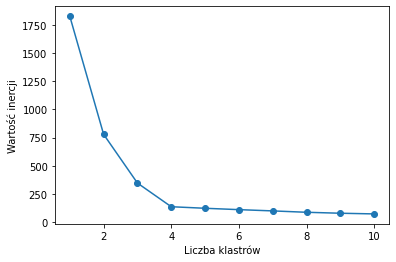

In [13]:
inertia_measures = []
arguments = np.arange(1, 11, 1)
# Nauczmy model dla różnej liczby klastrów i policzmy dla każdej wersji wartość inercji.
for j in range(1, 11):
    clustering = KMeans(n_clusters=j, init='k-means++',
                        max_iter=100, random_state=1)
    clustering.fit(X)
    inertia_measures.append(clustering.inertia_)

fig, ax = plt.subplots()
ax.plot(arguments, inertia_measures, marker='o')
ax.set_xlabel('Liczba klastrów')
ax.set_ylabel('Wartość inercji')
plt.show()

Wykres osypiska załamuje się w punkcie 4, zatem liczba klastrów wydaje się być optymalna. Trudno było oczekiwać innej liczby, skoro tak zaprojektowaliśmy zbiór. Nie mniej to tylko trening. Gdy dostaniemy dane, o których nie wiemy zbyt wiele, wówczas wykres osypiska jest dobrym sposobem wyboru liczby klastrów (podobnie jak liczby składowych głównych w PCA).

Dajmy teraz własne, "zepsute" środki ciężkości klastrów i zobaczmy, jak algorytm sobie poradzi. Uwaga: powinien pojawić się warning, ponieważ inicjujemy ręcznie centra. Robimy to jednak tylko dla pokazania, co może się stać, gdy postąpimy nie tak, jak powinniśmy. Ograniczymy się jedynie do 4 iteracji algorytmu.

C:\Users\Karol-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


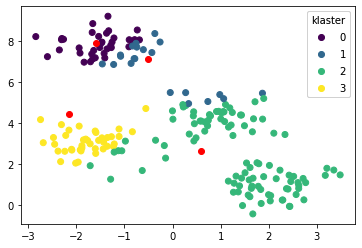

In [15]:
initial_centers = np.array([[-2, 8], [0, 8], [-1.5, 6], [-3, 7]])
clustering = k_means_clustering(X, 4, initial_centers, 4)

Jak widzimy, dotychczas wyznaczone centra są dalekie od optymalnych.